In [27]:
### 1. Library Imports and Excel File Read-in

import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_excel('/Users/mburley/Desktop/2022 Oakley Data/2022_Oakley_Transactions_Master.xlsx') #Reads in data from excel file
print(df.tail(5))

     Date Bought 2021 Date Bought 2022  Date Sold   Website State Bought  \
1056              NaT       2022-11-15 2022-12-05  Facebook           AL   
1057              NaT       2022-11-17 2022-12-12  Facebook           SC   
1058              NaT       2022-11-18 2022-12-24     Forum           MN   
1059              NaT       2022-11-18 2022-12-09     Forum           MN   
1060              NaT       2022-11-21        NaT  Facebook           CA   

              Frame Style    Frame Color           Lenses   Paid  Sale Price  \
1056  Racing Jacket Gen 2       New Blue  Positive Red IR   40.0       300.0   
1057                   XX        X-Metal         Black IR  300.0       600.0   
1058          Razor Blade          White     Bronze Blade   75.0       150.0   
1059                Plate    Dark Silver         Black IR  190.0       450.0   
1060        **Monster Dog  Crystal Black         Black IR   70.0         NaN   

      ...  SALES  Unnamed: 30  Unnamed: 31 Personal Pairs Unna

In [28]:
### 2. Drop Columns 

df = df.drop(['Date Bought 2021', 'Week', 'Transfer Fees (Paypal)', 'Parts','Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Extra Charges', 'SALES', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 30', 'Unnamed: 31', 'Personal Pairs', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 37', 'Additional Write-offs'], 1)
df

,Date Bought 2022,Date Sold,Website,State Bought,Frame Style,Frame Color,Lenses,Paid,Sale Price,Total,Profit*,Shipping Fees*,Unnamed: 38
0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.0
1,NaT,2022-01-09,Facebook,NaN,M Frame Gen 2,Matte Black,NaN,25.0,50.0,49.97,24.97,3.77,NaN
2,NaT,2022-02-12,eBay,NaN,M Frame Mumbo,White,NaN,50.0,60.0,57.17,7.17,3.72,525.0
3,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,2022-11-15,2022-12-05,Facebook,AL,Racing Jacket Gen 2,New Blue,Positive Red IR,40.0,300.0,245.99,205.99,4.04,NaN
1057,2022-11-17,2022-12-12,Facebook,SC,XX,X-Metal,Black IR,300.0,600.0,600.00,300.00,5.65,NaN
1058,2022-11-18,2022-12-24,Forum,MN,Razor Blade,White,Bronze Blade,75.0,150.0,129.45,54.45,3.98,NaN
1059,2022-11-18,2022-12-09,Forum,MN,Plate,Dark Silver,Black IR,190.0,450.0,367.00,177.00,4.55,NaN


In [29]:
### 3. List Column Data Types

# Convert "Paid' column to float64 by first changing NaN to 0
df['Paid'].fillna(0).astype(float)

# Convert 'Sale Price' column to float64 by first changing NaN to 0
#print(df.loc[pd.to_numeric(df['Sale Price'], errors='coerce').isnull()])
#pd.to_numeric(df['Sale Price']).astype(int)
df["Sale Price"] = df["Sale Price"].astype(str).str.strip().replace("",0).astype(float)

# Convert "Date Bought" column to Datetime
df['Date Bought 2022'].apply(pd.to_datetime)

# Convert "Date Sold" column to Datetime
df['Date Sold'].apply(pd.to_datetime)

# List Data Types
df.dtypes

Date Bought 2022    datetime64[ns]
Date Sold           datetime64[ns]
Website                     object
State Bought                object
Frame Style                 object
Frame Color                 object
Lenses                      object
Paid                       float64
Sale Price                 float64
Total                      float64
Profit*                    float64
Shipping Fees*             float64
Unnamed: 38                float64
dtype: object

In [30]:
### 4. Describe Data

df.describe()

,Paid,Sale Price,Total,Profit*,Shipping Fees*,Unnamed: 38
count,1053.000000,1040.000000,1040.000000,1040.000000,976.000000,10.000000
mean,59.403010,132.987019,121.429048,61.917192,4.333617,550.000000
std,59.727888,114.231967,100.179015,49.501822,2.675110,26.352314
min,2.000000,20.000000,19.580000,-8.800000,2.750000,525.000000
25%,25.000000,70.000000,64.342500,32.637500,3.720000,525.000000
50%,45.000000,105.000000,96.065000,48.740000,3.870000,550.000000
75%,65.000000,140.000000,129.485000,71.755000,4.150000,575.000000
max,525.000000,900.000000,792.300000,392.780000,66.500000,575.000000


In [31]:
### 5. Find Sum Totals for "Paid", "Sale Price", "Profit", "Shipping Fees" Columns

print("Total Spent on Inventory Acqiusition: $" + df['Paid'].sum().astype(str))
print("Total Amount Sold: $" + df['Sale Price'].sum().astype(str))
print("Total Net Profit: $" + df['Profit*'].sum().astype(str))
print("Total Spent on Shipping Fees: $" + df['Shipping Fees*'].sum().astype(str))

Total Spent on Inventory Acqiusition: $62551.369999999995
Total Amount Sold: $138306.5
Total Net Profit: $64393.880000000005
Total Spent on Shipping Fees: $4229.61


Frame Style
M Frame          72
M Frame Pro      37
Jawbone          28
Juliet           26
Radar            25
Eye Jacket       21
Fives 2.0        20
Oil Rig          18
XX Twenty        17
M Frame Gen 2    17
Name: Sale Price, dtype: int64

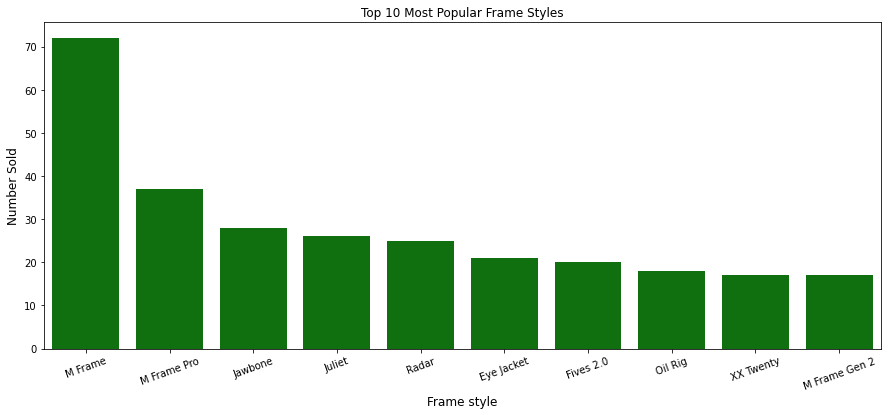

In [32]:
### 6. Top 10 Most Popular Frame Styles

# Count 'Frame Style' values based on 'Sale Price' entries counted up, and sort the counted 'Paid' values highest to lowest, display Top 10
freq_frames_sold = df.groupby('Frame Style').count().sort_values(['Sale Price'], ascending=False)['Sale Price'].head(10)
display(freq_frames_sold)

### Graph:

# Create Seaborn Barplot and rename y label
plt.figure(figsize=(15,6))
# x = 'Values Displayed for x axis' and y = 'Values Displayed for y axis' and data = location data is being pulled in from
chart6 = sns.barplot(x = 'Frame Style', y = 'Sale Price', data = freq_frames_sold.reset_index(), color = "green")
plt.xlabel('Frame style', size = 12)
plt.ylabel('Number Sold', size = 12)
chart6.set_title('Top 10 Most Popular Frame Styles', size = 12)
# Rotates x axis values
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=20)
plt.show()

,Date Bought 2022,Date Sold,Website,State Bought,Frame Style,Frame Color,Lenses,Paid,Sale Price,Total,Profit*,Shipping Fees*,Unnamed: 38
281,2022-02-20,2022-07-16,Forum,OK,XX,24K,24K Gold IR,525.0,900.0,777.29,252.29,12.58,NaN
536,2022-05-04,2022-05-29,Forum,KS,Mars,X-Metal,Black IR,500.0,900.0,792.30,292.30,11.81,NaN
528,2022-05-02,2022-06-09,Offerup,CA,XX,X-Metal,Black IR,415.0,850.0,741.55,326.55,11.49,NaN
1032,2022-10-28,2022-12-12,Facebook,IN,Romeo 1,X-Metal,Black IR,500.0,780.0,629.71,129.71,7.37,NaN
823,2022-07-25,2022-08-31,Facebook,TX,OTT,FMJ 5.56,Ice IR,450.0,750.0,716.32,266.32,66.50,NaN
328,2022-03-03,2022-03-20,Facebook,MD,OTT,FMJ,Fire IR,325.0,740.0,644.36,319.36,9.12,NaN
294,2022-02-24,2022-03-21,Facebook,AL,XX,24K,24K Gold IR,300.0,700.0,612.15,312.15,7.05,NaN
434,2022-03-30,2022-07-11,OF,UK,Romeo 1,X-Metal,Jade/Black IR,370.0,700.0,700.00,330.00,11.50,NaN
754,2022-07-02,2022-08-06,Facebook,CAN,XX,24K,24K Gold IR,364.8,700.0,611.10,246.30,9.72,NaN
443,2022-04-03,2022-08-03,Forum,TX,XX,24K,24K Gold IR,360.0,680.0,680.00,320.00,8.95,NaN


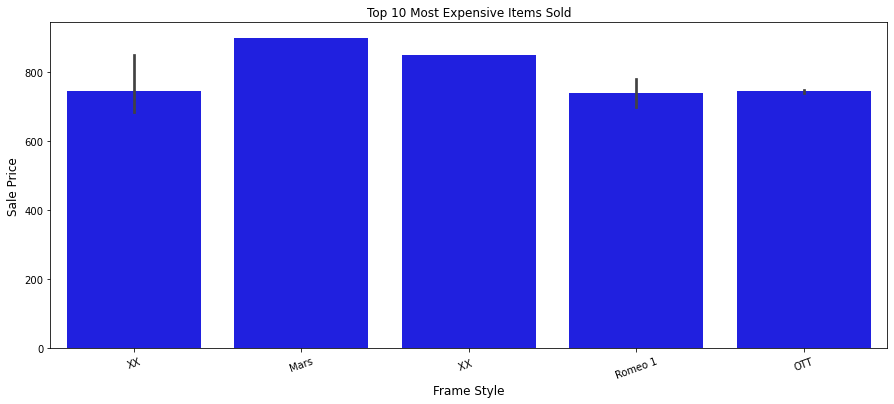

In [33]:
### 7. Top 10 Most Expensive Items Sold

# .nlargest(how many largest values shown, in which columns)
df7 = df.nlargest(10, ['Sale Price'], keep = 'all')
display(df7)

### Graph:

plt.figure(figsize=(15,6))
chart7 = sns.barplot(x = 'Frame Style', y = 'Sale Price', data = df7, color = "Blue")
plt.xlabel('Frame Style', size = 12)
plt.ylabel('Sale Price', size = 12)
chart7.set_title('Top 10 Most Expensive Items Sold', size = 12)
chart7.set_xticklabels(chart7.get_xticklabels(), rotation=20)
plt.show()

Website
Facebook      653
Offerup       141
eBay          105
Forum          77
Craigslist     23
Poshmark       14
OF             11
OF              8
Mercari         7
Goodwill        4
OfferUp         2
ebay            1
Name: Paid, dtype: int64

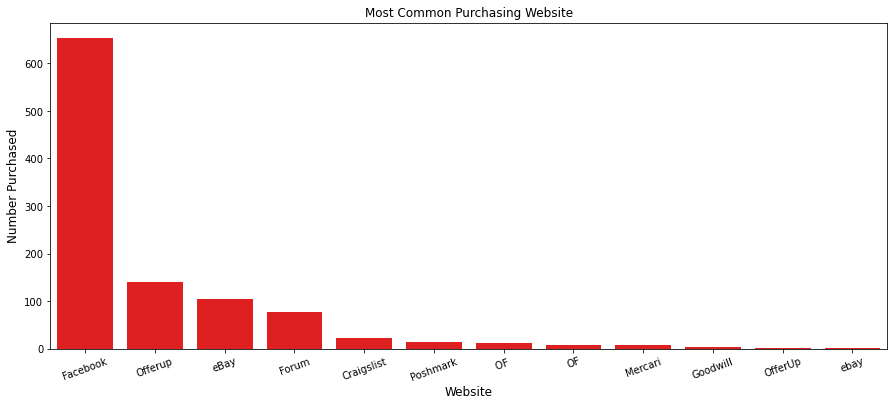

In [34]:
### 8. Most Common Purchasing Website

# Display 'Website' and count(), and display values in the 'Paid' column from high to low, ['Paid'] at end means display ONLY that col
freq_websites = df.groupby('Website').count().sort_values(['Paid'], ascending = False)['Paid']
display(freq_websites)
# df['Location'].count()

### Graph:

# Create Seaborn Barplot and rename y label
plt.figure(figsize=(15,6))
# x = 'Values Displayed for x axis' and y = 'Values Displayed for y axis' and data = location data is being pulled in from
chart8 = sns.barplot(x = 'Website', y = 'Paid', data = freq_websites.reset_index(), color = "red")
plt.xlabel('Website', size = 12)
plt.ylabel('Number Purchased', size = 12)
chart8.set_title('Most Common Purchasing Website', size = 12)
# Rotates x axis values
chart8.set_xticklabels(chart8.get_xticklabels(), rotation = 20)
plt.show()

In [35]:
### 9. Compute Total Amount Purchased and Sold from Each Website

# Display Amount Purchased from each Website
sum_per_website = df.groupby(['Website']).sum().sort_values(['Paid'], ascending = False)['Paid']
display(sum_per_website)

# Display Amount Sold from each Website
sum_sold_website = df.groupby(['Website']).sum().sort_values(['Sale Price'], ascending = False)['Sale Price']
display(sum_sold_website)

### Graph: 

# Create df with website and summed values
df9 = df.groupby(['Website']).sum().sort_values(['Paid'], ascending = False).drop(['Total', 'Profit*', 'Shipping Fees*'], 1)
display(df9)

Website
Facebook      37427.11
Forum          7379.00
Offerup        6621.00
eBay           5365.71
Craigslist     2554.00
OF             1070.00
OF              845.00
Poshmark        569.72
Mercari         295.63
Goodwill        159.90
OfferUp          79.44
ebay             64.86
Name: Paid, dtype: float64

Website
Facebook      85709.0
Offerup       15133.0
Forum         14613.0
eBay          11287.0
Craigslist     4928.0
OF             2102.5
OF             1845.0
Poshmark       1151.0
Mercari         573.0
Goodwill        330.0
OfferUp         170.0
ebay            100.0
Name: Sale Price, dtype: float64

,Paid,Sale Price,Unnamed: 38
Website,,,
Facebook,37427.11,85709.0,4450.0
Forum,7379.00,14613.0,0.0
Offerup,6621.00,15133.0,0.0
eBay,5365.71,11287.0,525.0
Craigslist,2554.00,4928.0,0.0
OF,1070.00,2102.5,0.0
OF,845.00,1845.0,0.0
Poshmark,569.72,1151.0,0.0
Mercari,295.63,573.0,0.0


In [36]:
### 10. Count the Number of Items Bought and Sold

total_bought = df['Paid'].count().astype(str)
print("Total Number of Items bought: " + total_bought)

total_sold = df['Sale Price'].count().astype(str)
print("Total Number of Items Sold: " + total_sold)

print("\n")

### 10.5. Count the Number of Complete Pairs Bought and Sold

total_complete_bought = df.dropna(axis=0, subset=['Frame Color', 'Lenses']).count().astype(str)['Paid']
print("Total Number of Complete Pairs bought: " + total_complete_bought)

total_complete_sold = df.dropna(axis=0, subset=['Frame Color', 'Lenses']).count().astype(str)['Sale Price']
print("Total Number of Complete Pairs sold: " + total_complete_sold)


Total Number of Items bought: 1053
Total Number of Items Sold: 1040


Total Number of Complete Pairs bought: 732
Total Number of Complete Pairs sold: 724


In [37]:
### 11. Most profitable Frame Style Based on Avg Sale of all counted "Frame Styles" (Tests profitability vs. availibility)
## Ex. (M Frame Avg Profit) * (Number of M Frames Sold / Total Frames Sold)

# Create var = Grouped Frame Style Values
group = df.groupby('Frame Style', sort = False)
#group

# Using group var, find mean of profit values for each frame, times counted frame sold / total sold like Example above and sort
weighted_profit = group['Profit*'].sum()*(group['Profit*'].count().astype(float)/total_sold.astype(float))
weighted_profit.sort_values(ascending = False).head(15)


Frame Style
M Frame            240.547846
Juliet             100.229500
M Frame Pro         78.153250
Jawbone             49.904615
Radar               28.909135
Eye Jacket          28.758692
Inmate              26.466346
XX                  25.030096
M Frame Gen 2       18.956144
Fives 2.0           18.657308
Oil Rig             17.300596
XX Twenty           15.648173
Monster Dog         12.907231
Straight Jacket     11.812500
Splice              11.048846
Name: Profit*, dtype: float64

Weekday Bought
Sunday       183
Thursday     136
Saturday     129
Wednesday    128
Monday       122
Tuesday      114
Friday        88
Name: Paid, dtype: int64

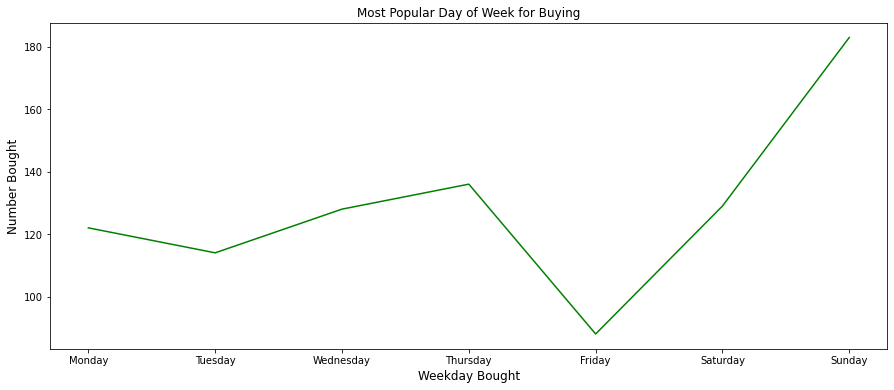

In [38]:
### 12. Most Popular Day of Week for Buying 2022

## Most Popular Buying Day
# Insert Weekday Column for day of the week bought in form df.insert(position, 'name_of_column', what you're doing)
#df.insert(1, 'Weekday Bought', df['Date Bought'].dt.day_name())
# Create Weekday Bought Column  by converting 'Date Bought' to day of week name
df['Weekday Bought'] = df['Date Bought 2022'].dt.day_name()
#df.tail(10)

# Count each day of week value in "Weekday Bought" and list high to low
df12 = df.groupby('Weekday Bought').count().sort_values(['Paid'], ascending = False)['Paid']
display(df12)

### Graph:
# Reset Index and do Custom Sorting
df12 = df12.reset_index()
df12['Weekday Bought'] = pd.Categorical(df12['Weekday Bought'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df12 = df12.sort_values('Weekday Bought')

# Generate Line Graph with x = Weekday Bought (Mon - Sun) and y = Counted Paid Values
plt.figure(figsize=(15,6))
chart12 = sns.lineplot(x = 'Weekday Bought', y = 'Paid', data = df12, color = "green")
plt.xlabel('Weekday Bought', size = 12)
plt.ylabel('Number Bought', size = 12)
chart12.set_title('Most Popular Day of Week for Buying', size = 12)
plt.show()

In [39]:
### 13. Compute Profit Acquired on Each Day of Week from above Data -> Display 'Weekday Bought' and "Profit*"

# as_index = FALSE says we don't want to set the column ID as the index!
df.groupby(['Weekday Bought'], as_index = False)['Profit*'].sum().sort_values(['Profit*'], ascending = False)


,Weekday Bought,Profit*
3,Sunday,12165.35
4,Thursday,8797.03
2,Saturday,8446.66
6,Wednesday,8062.96
1,Monday,7061.41
5,Tuesday,6789.75
0,Friday,5598.76


Weekday Sold
Sunday       170
Monday       156
Tuesday      156
Saturday     142
Thursday     139
Wednesday    136
Friday       128
Name: Sale Price, dtype: int64

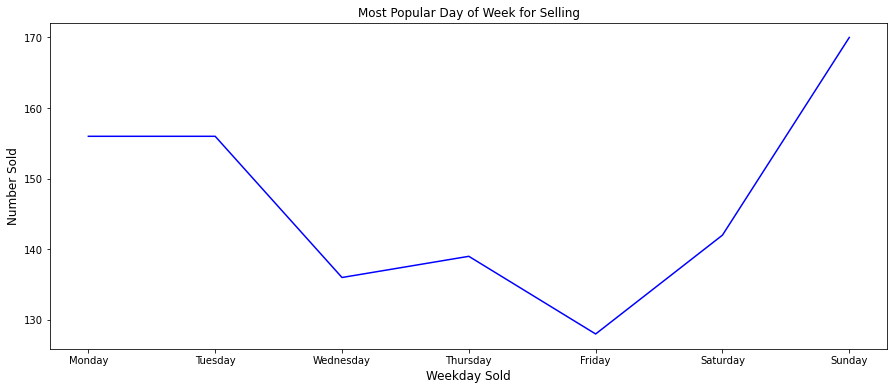

In [40]:
### 14. Most Popular Day of Week for Selling

## Most Popular Selling Day
# Insert Weekday Column for day of the week Sold in form df.insert(position, 'name_of_column', what you're doing)
df['Weekday Sold'] = df['Date Sold'].dt.day_name()
#df.tail(10)

# Count each day of week value in "Weekday Bought" and list high to low
df14 = df.groupby('Weekday Sold').count().sort_values(['Sale Price'], ascending = False)['Sale Price']
display(df14)

### Graph:
# Reset Index and do Custom Sorting
df14 = df14.reset_index()
df14['Weekday Sold'] = pd.Categorical(df14['Weekday Sold'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df14 = df14.sort_values('Weekday Sold')

# Generate Line Graph with x = Weekday Sold (Mon - Sun) and y = Counted Sale Price Values
plt.figure(figsize=(15,6))
chart14 = sns.lineplot(x = 'Weekday Sold', y = 'Sale Price', data = df14, color = "blue")
plt.xlabel('Weekday Sold', size = 12)
plt.ylabel('Number Sold', size = 12)
chart14.set_title('Most Popular Day of Week for Selling', size = 12)
plt.show()


,Weekday Sold,Sale Price
1,Monday,24401.5
3,Sunday,20686.0
5,Tuesday,20534.5
4,Thursday,18736.0
2,Saturday,18698.0
6,Wednesday,18012.5
0,Friday,15873.0


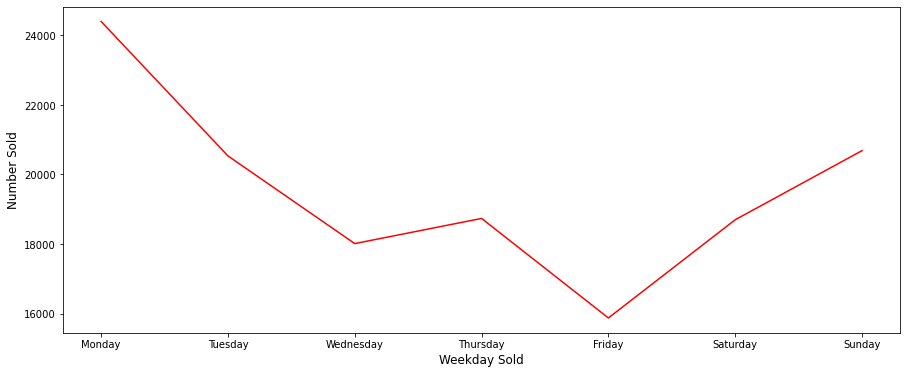

In [41]:
### 15. Compute Amount Sold on Each Day of Week from above Data -> Display 'Weekday Sold' and 'Sale Price'

# as_index = FALSE says we don't want to set the column ID as the index!
df15 = df.groupby(['Weekday Sold'], as_index = False)['Sale Price'].sum().sort_values(['Sale Price'], ascending = False)
display(df15)

### Graph:
# Reset Index and do Custom Sorting
df15 = df15.reset_index()
df15['Weekday Sold'] = pd.Categorical(df15['Weekday Sold'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df15 = df15.sort_values('Weekday Sold')

# Generate Line Graph with x = Weekday Sold and y = Summed Sale Price Values
plt.figure(figsize=(15,6))
chart15 = sns.lineplot(x = 'Weekday Sold', y = 'Sale Price', data = df15, color = "red")
plt.xlabel('Weekday Sold', size = 12)
plt.ylabel('Number Sold', size = 12)
chart12.set_title('Amount Sold on Each Day of Week', size = 12)
plt.show()

In [42]:
### 16. Best Week For Buying

# Best Week for Buying (Week with Most Bought)
# Creates "Week Bought" column and sets it equal to the week number from the date of the item sold
df['Week Bought'] = df['Date Bought 2022'].dt.strftime('%U')
df.tail(30)
df.groupby('Week Bought').sum().sort_values(['Paid'], ascending = False).head(10)['Paid']


Week Bought
20    3213.61
14    2724.10
18    2635.42
08    2220.67
24    2121.10
30    2091.58
09    1988.89
10    1826.39
06    1775.19
37    1592.91
Name: Paid, dtype: float64

In [43]:
### 17. Best Month For Buying 

# Best Month for Buying
# Creates "Month Bought" column and sets it equal to the month number from the date of the item bought then converts to Month Names in datetime dtype
df['Month Bought'] = pd.to_datetime(df['Date Bought 2022'], format='%m').dt.month_name().str.slice(stop=12)

# Group "Month Bought" then sum, sort and display "Paid" values
df.groupby('Month Bought').sum().sort_values(['Paid'], ascending = False)['Paid']


Month Bought
May          8530.94
March        7688.18
April        6861.54
July         6224.66
February     5779.25
June         5735.87
August       3824.54
January      3520.64
September    3338.35
October      2445.08
November     1449.50
Name: Paid, dtype: float64

In [44]:
### 18. Best Month For Selling 

# Best Month for Selling
# Creates "Month Sold" column and sets it equal to the month number from the date of the item sold then converts it to a Month Name and datetime dtype
df['Month Sold'] = pd.to_datetime(df['Date Sold'], format='%m').dt.month_name()

# Group "Month Sold" then sum, sort and display "Sale Price" values
df.groupby('Month Sold').sum().sort_values(['Sale Price'], ascending = False).head(10)['Sale Price']


Month Sold
July        19553.0
August      17733.0
April       13690.0
June        12381.5
May         12365.0
March       11106.0
December     9279.0
February     8955.5
October      8386.5
November     8217.0
Name: Sale Price, dtype: float64

In [45]:
### 19. Compute the Avg Number of Items Bought/Sold Per Day -> Total Bought/Sold(Prompt 10) / Total Days

# Compute Total Number of Days
least_recent_date = dt(2022, 1, 1)
most_recent_date = df['Date Bought 2022'].max()
#print(most_recent_date)
time_delta = most_recent_date - least_recent_date
#print(time_delta)

# Convert time_delta from timedelta to float
total_days = time_delta.total_seconds() / (24 * 60 * 60)
#print(total_days)


## Avg Number of Pairs Bought Per Day
bought_2022 = total_bought.astype(float) - 161
#print(bought_2022)
avg_bought_per_day = (bought_2022.astype(float) / total_days).astype(str)
print("The Average Number of Items Bought per day is: " + avg_bought_per_day)


## Avg Number of Pairs Sold Per Day
#print(total_sold)
avg_sold_per_day = (total_sold.astype(float) / total_days).astype(str)
print("The Average Number of Items Sold per day is: " + avg_sold_per_day)


The Average Number of Items Bought per day is: 2.753086419753086
The Average Number of Items Sold per day is: 3.2098765432098766


In [46]:
### 20. Count Total Number of Pairs Bought from each State

# Display Amount Purchased from each Website
pairs_from_state = df.value_counts(['State Bought'])
display(pairs_from_state.head(10))


State Bought
CA              151
TX               70
CO               52
FL               41
WI               33
IA               28
NC               25
GA               24
MN               24
TN               24
dtype: int64

In [47]:
### 21. Coumpute Total Amount Bought from each State

# Group "State Bought" then sum, sort and display "Paid" values
df.groupby('State Bought').sum().sort_values(['Paid'], ascending = False).head(10)['Paid']


State Bought
CA    8776.70
TX    4856.60
CO    2689.02
KS    2598.00
FL    2444.52
VA    2204.84
OH    1738.19
AZ    1670.27
PA    1630.81
WI    1445.00
Name: Paid, dtype: float64

In [48]:
### 22. Compute Total Profit Aquired from each State

# Group "State Bought" then sum, sort and display "Profit*" values
df.groupby('State Bought').sum().sort_values(['Profit*'], ascending = False).head(10)['Profit*']


State Bought
CA    8569.01
TX    5016.20
CO    3367.61
FL    2774.16
KS    1969.61
VA    1905.68
NC    1851.70
WI    1659.42
IA    1611.82
AZ    1532.20
Name: Profit*, dtype: float64

In [49]:
### 23. Compute Avg Amount Bought Per Week -> (Total Bought / Num Weeks)

# Compute the total amount bought 
total_bought = df['Paid'].sum()
#print(total_bought)

# Count the number of weeks
df['Week Bought'] = df['Week Bought'].astype(str).str.strip().replace("",0).astype(float)
count_weeks = df['Week Bought'].max()
#print(count_weeks)

# Computation
avg_bought_per_week = (total_bought - 7283.6) / (count_weeks + 1)
print("The average amount bought per week is: $" + avg_bought_per_week.round(2).astype(str))

The average amount bought per week is: $1151.41


In [50]:
### 24. Compute Avg Number of Items bought per week

# Load in total number of pairs bought
total_bought = df['Paid'].count()
#print(total_bought)

# Count total number of weeks
#print(count_weeks)

# Divide total bought divided by total weeks to compute AVG
avg_num_bought_per_week = (total_bought / count_weeks)
#str(avg_num_bought_per_week)
print("The avg number of items purchased per week is: " + avg_num_bought_per_week.round(2).astype(str))

The avg number of items purchased per week is: 22.4


In [51]:
### 25. Compute Net Profit Margin (Profiability) as a Percentage of Revenue

total_profit = df['Profit*'].sum()
total_profit

total_revenue = df['Sale Price'].sum()
total_revenue

total_ship_costs = df['Shipping Fees*'].sum()
total_ship_costs

# Compute Post Shipping fee Net Profit Margin
profitability = (total_profit - total_ship_costs) / total_revenue
percentage = "{:.2%}".format(profitability)
print('The Net Profit Margin is: ' + percentage)

The Net Profit Margin is: 43.50%


In [52]:
### 26. Compute Inventory Assets vs. COGS (Total amount of inventory and total amount sold)

# Create Inventory data frame by selecting rows where the Sale Price column values are Null 
df_inv = df[df['Sale Price'].isnull()]
df_inv.head(10)

# Sum Paid column values in df_inv to get total current inventory assets
total_inv = df_inv['Paid'].sum()
print("The total current inventory asset amount is: $" + total_inv.round(2).astype(str))

# Create COGS data frame by selecting rows where the Sale Price column values are NOT Null 
df_cogs = df[df['Sale Price'].notnull()]
df_cogs.head(10)

# Sum Paid column values in df_inv to get total current inventory assets
total_cogs = df_cogs['Paid'].sum()
print("The total COGS is: $"+ total_cogs.round(2).astype(str))


The total current inventory asset amount is: $671.58
The total COGS is: $61879.79
